# Pretrained Deep Learning Networks

In [1]:
from torchvision import models

dir(models)

### Create an instance of the `AlexNet` class.

In [3]:
alexnet = models.AlexNet()

### Using the resnet101 function, a 101-layer convolutional neural network. <br>
Let’s create an instance of the network now. <br>
We’ll pass an argument that will
 instruct the function to download the weights of resnet101 trained on the ImageNet
 dataset, with 1.2 million images and 1,000 categories:

In [4]:
resnet = models.resnet101(pretrained=True)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


/home/abbask1552/miniconda3/envs/rapids-24.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/abbask1552/miniconda3/envs/rapids-24.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /home/abbask1552/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████████████████████████████████████████████████████████████████| 171M/171M [00:42<00:00, 4.17MB/s]


In [ ]:
print(resnet)

### Transform 
-> Define a preprocess function that will scale the input image to 256 × 256. <br>
-> Crop the image to 224 × 224 around the center. <br>
-> Transform it to a tensor. <br>
-> Normalize its RGB (red, green, blue) <br>

In [7]:
from torchvision import transforms

In [8]:
preprocess = transforms.Compose([
 transforms.Resize(256),
 transforms.CenterCrop(224),
 transforms.ToTensor(),
 transforms.Normalize(
 mean=[0.485, 0.456, 0.406],
 std=[0.229, 0.224, 0.225]
 )])

### Load an image of a dog

In [9]:
from PIL import Image
img = Image.open("dog_img.jpg")

In [10]:
print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x1440 at 0x7F56E70EC9A0>


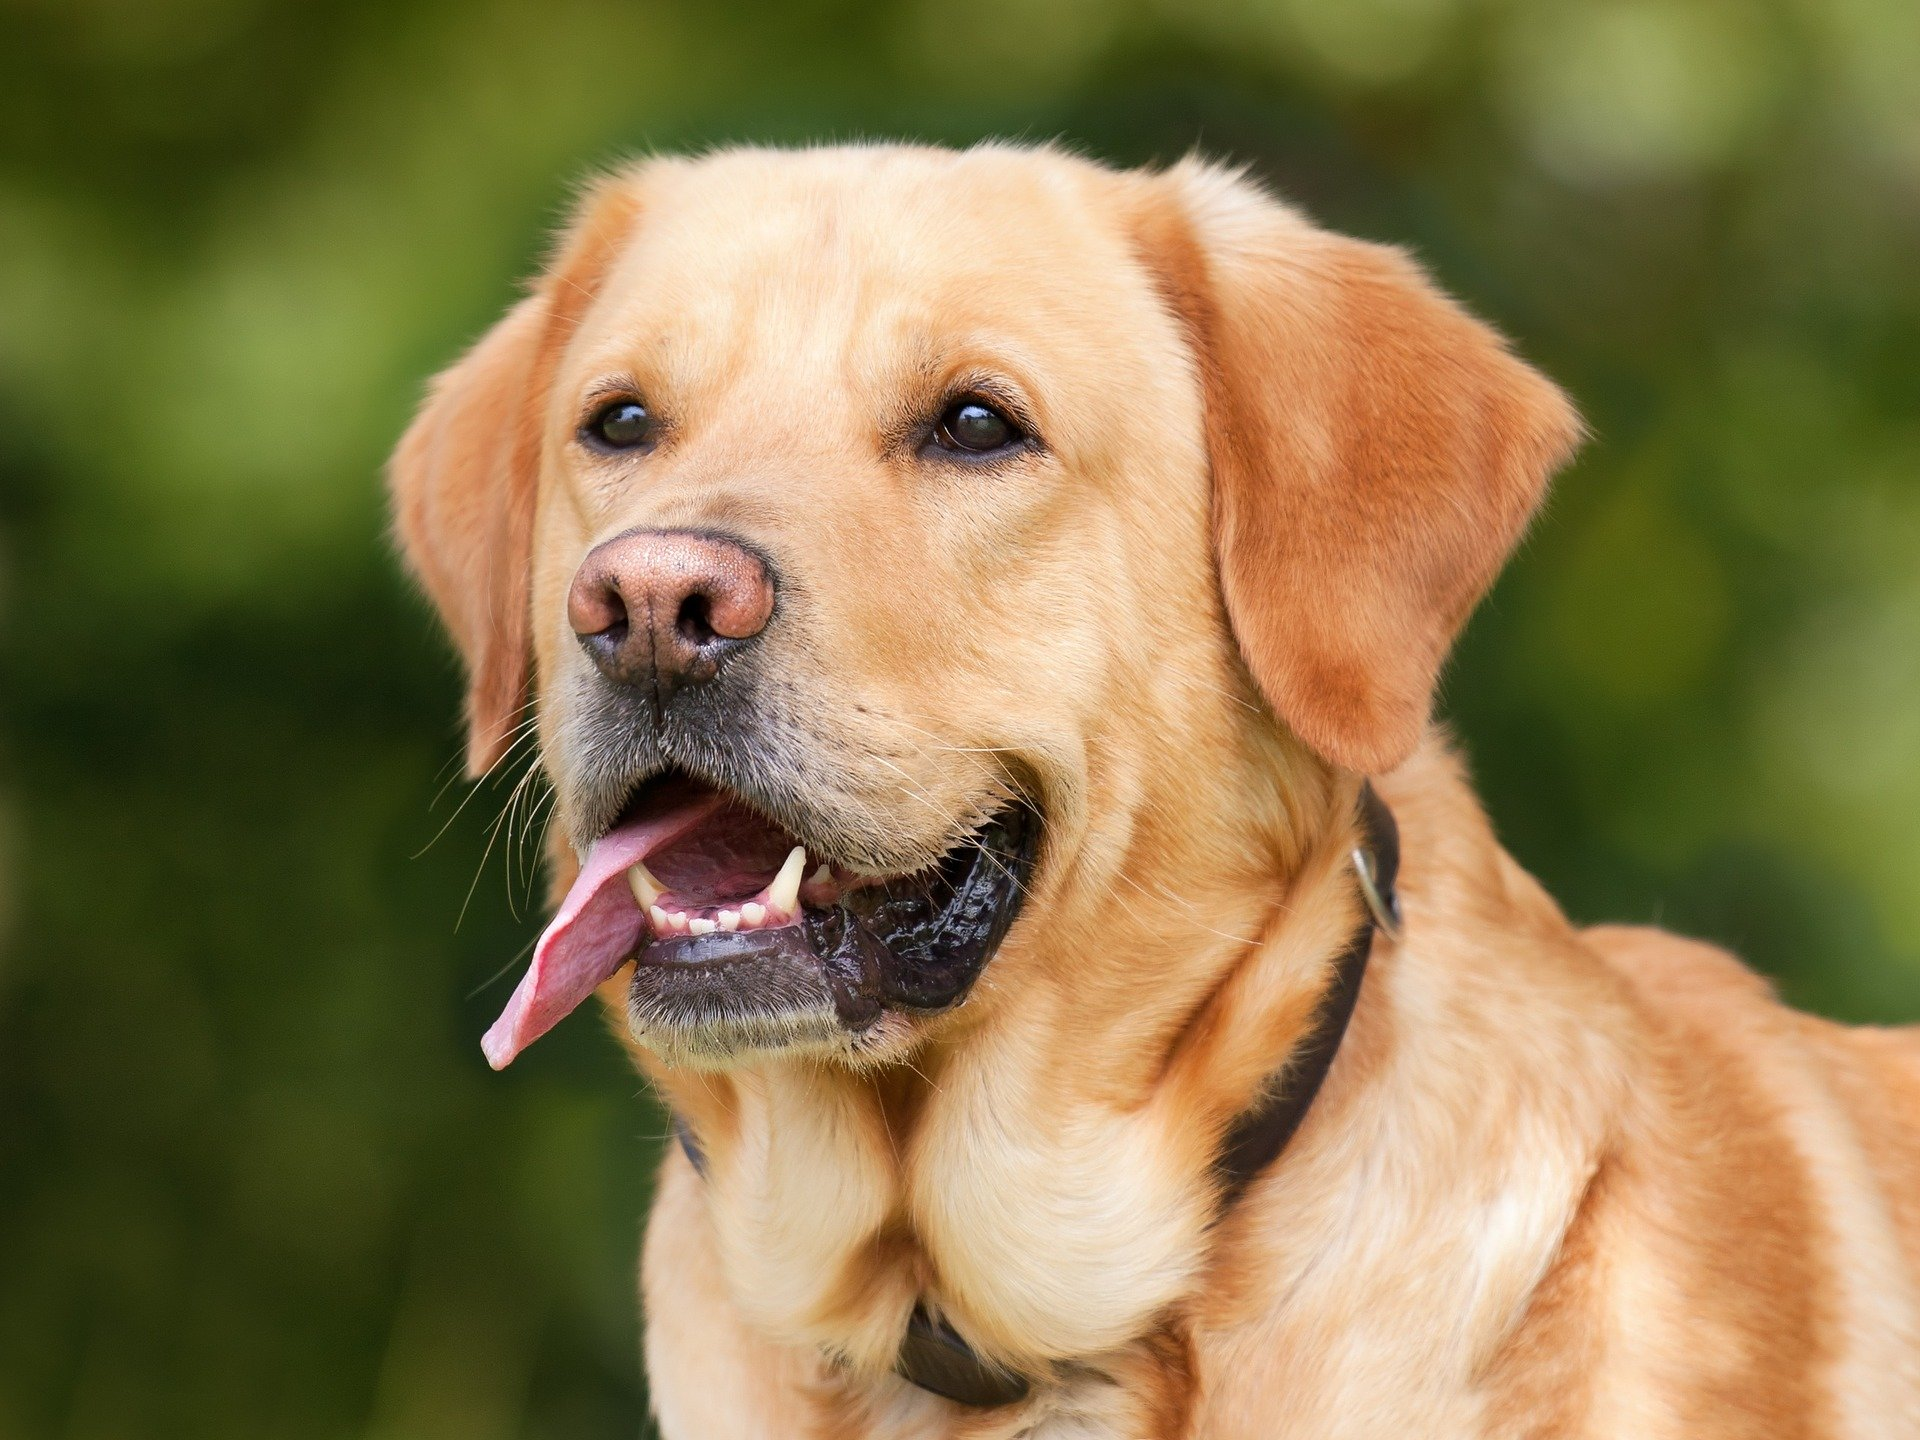

In [11]:
img.show()

#### Pass the image through preprocessing pipeline

In [12]:
img_t = preprocess(img)

In [13]:
img_t.shape

torch.Size([3, 224, 224])

#### Reshape image 

In [14]:
import torch
batch_t = torch.unsqueeze(img_t, 0)

In [15]:
img_t.shape

torch.Size([3, 224, 224])

## Run!

In [16]:
# evaluate the model
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [17]:
# inference the model
out = resnet(batch_t)

In [18]:
print(out)

tensor([[-5.4384e-01, -2.0669e+00, -2.1435e+00, -3.6505e+00, -3.4777e+00,
         -2.6073e+00, -3.0215e+00, -1.5359e+00, -6.9736e-01, -2.3172e+00,
         -1.2622e+00, -8.4043e-01, -1.8102e+00, -2.5342e+00, -8.9738e-01,
         -3.3517e+00, -1.9650e+00, -6.1825e-01, -1.8374e+00, -2.5952e+00,
         -2.6871e+00, -1.8018e+00, -9.1391e-01, -6.7476e-01, -1.1134e+00,
         -2.3280e-01, -2.1115e+00, -2.2081e+00, -5.8491e-01, -3.2164e+00,
         -2.0547e+00, -1.6123e+00, -1.7236e+00, -1.1735e+00, -3.0626e-01,
         -8.7500e-01, -7.4104e-01, -1.0820e+00, -8.2265e-01, -4.6388e-01,
         -6.2807e-01, -1.6843e+00,  5.5111e-01, -1.8164e+00, -1.3669e+00,
         -4.6105e-01,  6.6442e-01, -1.4283e-01, -2.6369e+00, -8.3126e-01,
         -1.2170e+00, -1.0672e+00, -3.9895e-01, -2.3478e-01, -1.5269e+00,
         -5.8300e-01, -4.7491e-01, -6.9803e-01, -1.6559e+00,  2.7740e-01,
          1.1908e+00, -6.2041e-01, -7.7262e-02,  5.7967e-01, -6.2749e-01,
         -1.0001e+00, -1.3881e+00,  8.

#### load the file containing the 1,000 labels for the ImageNet dataset classes.

In [19]:
with open('../data/p1ch2/imagenet_classes.txt') as f:
 labels = [line.strip() for line in f.readlines()]

FileNotFoundError: [Errno 2] No such file or directory: '../data/p1ch2/imagenet_classes.txt'

#### Determine the index corresponding to the maximum score in the out tensor we obtained previously.

In [20]:
_, index = torch.max(out, 1)

In [23]:
print(index)

tensor([208])
